# Домашнее задание

Применим простые ML и DL-подходы для решения задачи регрессии. Будем прогнозировать зарплату сотрудников по ее описанию (датасет отличается от датасета с занятия).

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

Считайте из файла jobs.csv первые 100_000 строк и выведите на экран первые 10 строк таблицы.

In [2]:
JOBS = 'https://www.dropbox.com/scl/fi/10z2fzgcldg9c0ghhekr9/jobs.csv?rlkey=j4b19zohmd8xai8zch42h5d7z&dl=1'

In [3]:
JOBS

'https://www.dropbox.com/scl/fi/10z2fzgcldg9c0ghhekr9/jobs.csv?rlkey=j4b19zohmd8xai8zch42h5d7z&dl=1'

In [4]:
df = pd.read_csv(JOBS, nrows=100_000)

In [53]:
df.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,72116516,Chartered Senior Quantity Surveyor,Award winning multi disciplinary consultancy a...,Somerset,Somerset,NaN,permanent,Resourcing Group,Consultancy Jobs,45000 - 55000/annum,50000,cv-library.co.uk
1,72547512,Net Developer VB / SQL Central Manchester *...,"A senior / experienced VB.Net Developer, with ...","Manchester, Greater Manchester, England, Great...",Manchester,NaN,permanent,CV Screen Ltd,IT Jobs,30000 - 45000/annum + benefits,37500,cv-library.co.uk
2,71680877,"Desktop Support Administrator Windows 7, Exch...","Desktop Support Administrator Windows 7, Exch...",Reading Berkshire South East,Reading,NaN,permanent,Spectrum IT,IT Jobs,26000 - 30000 per annum + excellent benefits,28000,totaljobs.com
3,70241394,Clinical Lead (RGN),RGN Clinical Lead Mid Glamorgan Very competiti...,Merthyr Tydfil Mid Glamorgan Wales,UK,NaN,permanent,BROOK STREET BUREAU Cardiff Care,Healthcare & Nursing Jobs,26026 - 29029 per annum + Benefits,27527,totaljobs.com
4,72692179,Charity Fundraisers GET PAID TO SAVE LIVES,CHARITY FUNDRAISING REPRESENTATIVES GET PAID ...,"Exeter,Devon,EXMOUTH,CREDITON,OTTERY ST MARY,D...",UK,NaN,permanent,Recruit4Talent,Sales Jobs,7 per hour + bonus,13440,jobsite.co.uk


## Задание 1

Для каждой категории профессий (столбец `Category`) вычислите среднюю зарплату.

Отсортируйте результаты в порядке убывания средней зарплаты.

В какой категории средняя зарплата максимальна?

In [54]:
df.groupby(by='Category').mean().sort_values('SalaryNormalized', ascending=False)

<ipython-input-54-dc1f20e5dfc5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Category').mean().sort_values('SalaryNormalized', ascending=False)


,Id,SalaryNormalized
Category,,
"Energy, Oil & Gas Jobs",7.004325e+07,46139.266065
IT Jobs,6.987420e+07,43960.589841
Legal Jobs,7.017890e+07,42483.794595
Accounting & Finance Jobs,6.979105e+07,38379.619805
Consultancy Jobs,6.979069e+07,37433.728528
Trade & Construction Jobs,7.015634e+07,36035.933427
Engineering Jobs,7.001868e+07,35710.654359
Other/General Jobs,7.012760e+07,35460.798630
"PR, Advertising & Marketing Jobs",6.999668e+07,35449.413650


Посмотрим на распределение логарифма целевой переменной.

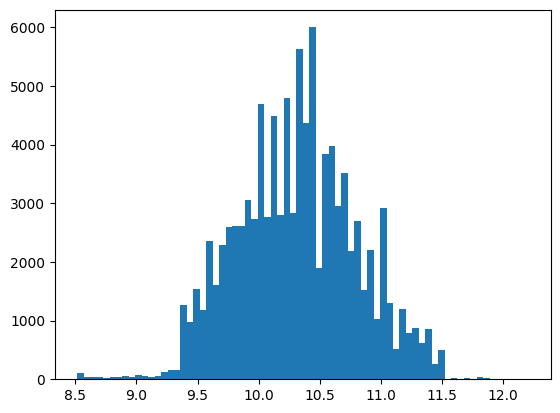

In [ ]:
plt.hist(np.log(df.SalaryNormalized), bins=70)
plt.show()

Она стала иметь распределение, более похожее на нормальное - это для нас удобно.

При помощи `train_test_split` разобъем данные на тренировочную и тестовую части:

В тест отправим 20% данных, зафиксируем `random_state=42`.

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df["FullDescription"], np.log(df["SalaryNormalized"]), test_size = 0.2, random_state=42)

## Задание 2

Обучите на тренировочных данных TfidfVectorizer с гиперпараметрами
`stop_words='english', min_df=5, max_df=1.0, ngram_range=(1, 1), max_features=1000`.

Затем примените обученный векторизатор и к трейну, и к тесту в отдельности.

Сколько столбцов стало в преобразованных матрицах `Xtrain` и `Xtest`?

In [6]:
tfidf_vec = TfidfVectorizer(stop_words='english', min_df=5, max_df=1.0, ngram_range=(1, 1), max_features=1000)

# ваш код здесь

X_train = tfidf_vec.fit_transform(Xtrain)
X_test = tfidf_vec.transform(Xtest)

In [7]:
X_train.shape, X_test.shape

((80000, 1000), (20000, 1000))

## Задание 3

Обучите Ridge-регрессию (с гиперпараметрами по умолчанию) на тренировочных данных и выведите качество модели ($R^2$) на трейне и на тесте.

Чему равно значение $R^2$ на тесте? Ответ округлите до сотых.

In [8]:
model = Ridge().fit(X_train, ytrain)

In [9]:
y_pred = model.predict(X_test)

In [10]:
r2_score(ytest, y_pred)

0.5735886323769972

## Задание 4

Посмотрите как работает ваша модель.

Так как мы обучали ее на логарифмированной зарплате, то от предсказания надо взять экспоненту (обратное преобразование).

Напомним, что `ridge` - это обученная модель, а `tfidf_vec` - обученный TfIdfVectorizer (у вас тут могут быть другие названия).

Вопросы:
* чему равна зарплата `director`, предсказываемая моделью?
* чему равна зарплата `manager`, предсказываемая моделью?

В ответ выведите бОльшую из этих зарплат, округленную до целого числа.

P.S. В модель нужно передать векторизованные слова `director` и `manager`.

In [11]:
np.exp(model.predict(tfidf_vec.transform([u"director"])))

array([76026.76148782])

In [12]:
np.exp(model.predict(tfidf_vec.transform([u"manager"])))

array([47703.76732048])

Поэкспериментируйте с моделью. Вычислите предсказываемую моделью зарплату:

* junior window cleaner
* chief window cleaner
* chief window cleaner and big data

In [66]:
np.exp(model.predict(tfidf_vec.transform([u"junior window cleaner"])))

array([18818.46778264])

In [65]:
np.exp(model.predict(tfidf_vec.transform([u"chief window cleaner"])))

array([27542.93805563])

In [67]:
np.exp(model.predict(tfidf_vec.transform([u"chief window cleaner and big data"])))

array([32633.08147761])

## Задание 5

Выведите на экран в виде pd.DataFrame топ-10 признаков с наибольшим положительным весом, а затем топ-10 признаков с наибольшим отрицательным весом.

Какой признак имеет наибольший положительный вес?

In [14]:
df_idf = pd.DataFrame(tfidf_vec.idf_, index=tfidf_vec.get_feature_names_out(), columns=["idf_weights"])

In [15]:
df_idf.sort_values(by='idf_weights', ascending=False)

,idf_weights
asbestos,6.776366
nbsp,5.945914
partie,5.836169
dynamics,5.818995
embedded,5.663077
...,...
working,1.613055
team,1.553702
work,1.516039
role,1.477061


In [16]:
importances = pd.DataFrame({'weights': model.coef_
                            ,'features': tfidf_vec.get_feature_names_out()})\
                            .sort_values(by='weights', ascending=False)
importances

,weights,features
265,1.015339,director
701,0.957334,privacy
770,0.893471,registration
499,0.762076,leadership
594,0.756171,nhs
...,...,...
279,-0.664668,duties
601,-0.676885,nvq
394,-0.712105,graduate
76,-0.879750,assistant


## Word2Vec

Теперь обучите word2vec на тренировочных данных.

Используйте гиперпараметры из [ноутбука](https://colab.research.google.com/drive/1MM2atgNv7PDaab1qDLEPux7aUFYbxjEE?usp=sharing).

Обучайте word2vec 3 эпохи.

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df[["FullDescription"]], np.log(df["SalaryNormalized"]), test_size = 0.2, random_state=42)

In [79]:
from gensim.models import Word2Vec

sent = [row.split() for row in Xtrain["FullDescription"]]

HIDDEN = 100

model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=HIDDEN,
                     sample=6e-5,
                     alpha=0.03,
                     min_alpha=0.0007,
                     negative=20,
                     workers=2)
model.build_vocab(sent, progress_per=10000)
model.train(sent, total_examples=model.corpus_count, epochs=3, report_delay=1)

(27821887, 58825338)

Будем вычислять вектор профессии как средний вектор всех ее слов.

In [19]:
def get_mean_w2v_vector(sentence):
    Sum = 0
    Count = 0

    words = sentence.split()

    for w in words:
        if w in model.wv:
            Sum += model.wv[w]
            Count += 1

    return Sum / Count

По аналогии с [ноутбуком](https://colab.research.google.com/drive/1MM2atgNv7PDaab1qDLEPux7aUFYbxjEE?usp=sharing) создайте в тренировочных и тестовых данных колонки, содержащие полученные числовые значения (компоненты word2vec-векторизации).

Затем удалите из матриц все остальные колонки.

In [20]:
NewCols = ['col'+str(i) for i in range(HIDDEN)]

Xtrain_wv = Xtrain.copy()
Xtest_wv = Xtest.copy()

Xtrain_wv['vectors'] = Xtrain_wv['FullDescription'].map(get_mean_w2v_vector)
Xtest_wv['vectors'] = Xtest_wv['FullDescription'].map(get_mean_w2v_vector)

In [84]:
Xtest_wv.columns

Index(['FullDescription', 'vectors'], dtype='object')

In [21]:
Xtrain_wv[NewCols] = pd.DataFrame(Xtrain_wv['vectors'].tolist(), index= Xtrain_wv.index)
Xtest_wv[NewCols] = pd.DataFrame(Xtest_wv['vectors'].tolist(), index= Xtest_wv.index)

<ipython-input-21-ca70de264cc3>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Xtrain_wv[NewCols] = pd.DataFrame(Xtrain_wv['vectors'].tolist(), index= Xtrain_wv.index)
<ipython-input-21-ca70de264cc3>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Xtrain_wv[NewCols] = pd.DataFrame(Xtrain_wv['vectors'].tolist(), index= Xtrain_wv.index)
<ipython-input-21-ca70de264cc3>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

In [22]:
Xtrain_wv.head()

,FullDescription,vectors,col0,col1,col2,col3,col4,col5,col6,col7,...,col90,col91,col92,col93,col94,col95,col96,col97,col98,col99
75220,You will be responsible for day to day liaison...,"[-0.22617671, 0.0655566, -0.32318267, 0.518299...",-0.226177,0.065557,-0.323183,0.518300,0.098899,0.241577,0.104000,-0.485835,...,0.035495,0.343133,-0.431646,0.011607,-0.029718,0.078379,0.052955,0.005259,0.261323,-0.076826
48955,Do you want a change? Do you want to choose wh...,"[0.03045081, 0.053165942, -0.058026902, 0.4964...",0.030451,0.053166,-0.058027,0.496425,0.065902,0.333106,0.180551,-0.359656,...,0.309000,0.249650,-0.713764,-0.073725,0.226781,0.145735,0.041632,0.319304,0.587457,-0.136949
44966,Position: Business Process Analyst ARIS Job t...,"[-0.18207148, 0.019041551, -0.060059384, 0.323...",-0.182071,0.019042,-0.060059,0.323796,-0.122855,0.175646,0.058596,-0.393218,...,0.102035,0.471042,-0.447055,-0.129442,0.055237,0.041346,0.000739,0.052893,0.209430,-0.092558
13568,"Ofqual regulates qualifications, exams and ass...","[-0.33257785, -0.12098869, -0.44726926, 0.4091...",-0.332578,-0.120989,-0.447269,0.409147,0.033083,0.278923,0.025120,-0.558317,...,0.224955,0.361697,-0.494516,0.039046,-0.072369,0.149438,0.214391,0.246103,0.307388,-0.063411
92727,Our Client based in East London have an urgent...,"[-0.22586446, 0.16735609, -0.24093644, 0.59820...",-0.225864,0.167356,-0.240936,0.598203,0.035310,0.151458,-0.065803,-0.251969,...,-0.187357,0.386819,-0.285506,0.032316,-0.031444,0.096468,-0.038741,-0.149914,0.198209,-0.178050


In [23]:
Xtrain_wv.drop(columns=['FullDescription', 'vectors'], inplace=True)
Xtest_wv.drop(columns=['FullDescription', 'vectors'], inplace=True)

## Задание 6

Обучите Ridge-регрессию с гиперпараметрами по умолчанию на полученных тренировочных данных.

Затем сделайте прогноз на тесте и выведите значение метрики $R^2$ на тесте. Ответ округлите до сотых.

In [95]:
Xtrain_wv.shape, ytrain.shape

((80000, 100), (80000,))

In [24]:
ridge_vw = Ridge().fit(Xtrain_wv, ytrain)

In [25]:
print("train R^2:", r2_score(ytrain, ridge_vw.predict(Xtrain_wv)))
print("test R^2:", r2_score(ytest, ridge_vw.predict(Xtest_wv)))

train R^2: 0.4752826371027783
test R^2: 0.4682941969406964


## Предобученные модели

Попробуем повторить эксперимент с предобученными моделями из [ноутука](https://colab.research.google.com/drive/1MM2atgNv7PDaab1qDLEPux7aUFYbxjEE?usp=sharing).

Загрузите модель `glove-twitter-25`.

In [26]:
import gensim.downloader

glove_vectors = gensim.downloader.load('glove-twitter-25')

[==================================================] 100.0% 104.8/104.8MB downloaded


Cкопируем из референсного ноутбука и немного модифицируем функцию для вычисления среднего вектора вакансии при помощи glove.

In [27]:
def get_mean_glove_vector(sentence):
    Sum = 0
    Count = 0

    try:
      words = sentence.split()
    except TypeError:
      words = []

    for w in words:
        if w in glove_vectors:
            Sum += glove_vectors[w]
            Count += 1

    if Count > 0:
        return Sum / Count
    return 0

Создайте признаки, являющиеся координатами glove-векторов вакансий. Действуйте по аналогии с тем, как вы действовали в предыдущем пункте (с моделью word2vec).

In [28]:
Xtrain_gl = Xtrain.copy()
Xtest_gl = Xtest.copy()

Xtrain_gl['vectors'] = Xtrain_gl['FullDescription'].map(get_mean_glove_vector)
Xtest_gl['vectors'] = Xtest_gl['FullDescription'].map(get_mean_glove_vector)

Удалим строки, для которых векторы не посчитались (все слова оказались неизвестными).

In [29]:
IdxTrain = []

for ix, row in Xtrain_gl.iterrows():
    if not isinstance(row['vectors'],np.ndarray):
        IdxTrain.append(ix)

IdxTest = []

for ix, row in Xtest_gl.iterrows():
    if not isinstance(row['vectors'],np.ndarray):
        IdxTest.append(ix)

In [40]:
len(IdxTrain), len(IdxTest)

(28, 9)

In [42]:
NewCols = ['col'+str(i) for i in range(25)]

In [34]:
Xtrain_gl.drop(index=IdxTrain, inplace=True)
Xtest_gl.drop(index=IdxTest, inplace=True)

ytrain_gl = ytrain.drop(index=IdxTrain)
ytest_gl = ytest.drop(index=IdxTest)

In [43]:
Xtrain_gl[NewCols] = pd.DataFrame(Xtrain_gl['vectors'].tolist(), index=Xtrain_gl.index)
Xtest_gl[NewCols] = pd.DataFrame(Xtest_gl['vectors'].tolist(), index= Xtest_gl.index)

In [44]:
Xtrain_gl.drop(['FullDescription','vectors'], axis=1, inplace=True)
Xtest_gl.drop(['FullDescription','vectors'], axis=1, inplace=True)

## Задание 7

Обучите ridge-регрессию с гиперпараметрами по умолчанию на тренировочных данных.

Выведите на экран значение $R^2$ на тесте, округленное до сотых.

In [45]:
clf = Ridge()
clf.fit(Xtrain_gl, ytrain_gl)

Ridge()

In [46]:
print("train R^2:", r2_score(ytrain_gl, clf.predict(Xtrain_gl)))
print("test R^2:", r2_score(ytest_gl, clf.predict(Xtest_gl)))

train R^2: 0.2161530983838824
test R^2: 0.22116550114045108


## Новые подходы

Теперь попробуем обучить fasttext на наших данных.

Гиперпараметры модели:
* `vector_size` - размер итогового вектора (по умолчанию 100)
* `window` - размер контекстного окна
* `min_count` - игнорируем слова, появляющиеся реже, чем min_count раз

По аналогии с word2vec (с тем же синтаксисом) обучите FastText с гиперпараметрами `vector_size=4, window=3, min_count=1`.

Обучайте модель 3 эпохи.

In [47]:
from gensim.models import FastText

model = FastText(vector_size=4, window=3, min_count=1)

model.build_vocab(sent, progress_per=10000)
model.train(sent, total_examples=model.corpus_count, epochs=3, report_delay=1)

(47126986, 58825338)

In [50]:
model.wv['привет']

array([ 0.09133936,  0.0260705 , -0.06672692,  0.18288428], dtype=float32)

## Задание 8

Повторите действия далее по аналогии с пунктом про word2vec.

Обучайте ridge-регрессию с гиперпараметрами по умолчанию.

Нас интересует $R^2$ на тесте, округленный до сотых.

In [51]:
NewCols = ['col'+str(i) for i in range(4)]

Xtrain_ft = Xtrain.copy()
Xtest_ft = Xtest.copy()

Xtrain_ft['vectors'] = Xtrain_ft['FullDescription'].map(get_mean_w2v_vector)
Xtest_ft['vectors'] = Xtest_ft['FullDescription'].map(get_mean_w2v_vector)

In [52]:
Xtrain_ft[NewCols] = pd.DataFrame(Xtrain_ft['vectors'].tolist(), index= Xtrain_ft.index)
Xtest_ft[NewCols] = pd.DataFrame(Xtest_ft['vectors'].tolist(), index= Xtest_ft.index)

In [54]:
Xtrain_ft.drop(columns=['FullDescription', 'vectors'], inplace=True)
Xtest_ft.drop(columns=['FullDescription', 'vectors'], inplace=True)

In [55]:
ridge_ft = Ridge().fit(Xtrain_ft, ytrain)

In [56]:
print("train R^2:", r2_score(ytrain, ridge_ft.predict(Xtrain_ft)))
print("test R^2:", r2_score(ytest, ridge_ft.predict(Xtest_ft)))

train R^2: 0.12907526771321154
test R^2: 0.12553536324118464


## "Стекинг"

Сконкатенируйте tfidf-признаки с word2vec-признаками (сконкатенируйте соответствующие матрицы).
Отдельно конкатенируйте трейн и отдельно тест.

In [57]:
Xtrain_lr = pd.DataFrame.sparse.from_spmatrix(X_train)
Xtest_lr = pd.DataFrame.sparse.from_spmatrix(X_test)

Xtrain_lr.shape

(80000, 1000)

In [72]:
Xtrain_lr.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.082905,0.000000,0.0,0.0,0.0,...,0.000000,0.063479,0.0,0.0,0.0,0.038358,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.065964,0.000000,0.161494,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.041899,0.000000,0.0,0.0,0.0,...,0.078241,0.000000,0.0,0.0,0.0,0.000000,0.060532,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.057189,0.000000,0.0,0.0,0.0,...,0.106793,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.064625,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.058338,0.000000,0.000000,0.0,0.0


In [71]:
Xtrain_wv.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col90,col91,col92,col93,col94,col95,col96,col97,col98,col99
75220,-0.226177,0.065557,-0.323183,0.518300,0.098899,0.241577,0.104000,-0.485835,-0.410213,-0.077558,...,0.035495,0.343133,-0.431646,0.011607,-0.029718,0.078379,0.052955,0.005259,0.261323,-0.076826
48955,0.030451,0.053166,-0.058027,0.496425,0.065902,0.333106,0.180551,-0.359656,-0.641724,-0.078189,...,0.309000,0.249650,-0.713764,-0.073725,0.226781,0.145735,0.041632,0.319304,0.587457,-0.136949
44966,-0.182071,0.019042,-0.060059,0.323796,-0.122855,0.175646,0.058596,-0.393218,-0.146582,-0.028532,...,0.102035,0.471042,-0.447055,-0.129442,0.055237,0.041346,0.000739,0.052893,0.209430,-0.092558
13568,-0.332578,-0.120989,-0.447269,0.409147,0.033083,0.278923,0.025120,-0.558317,-0.362141,-0.169402,...,0.224955,0.361697,-0.494516,0.039046,-0.072369,0.149438,0.214391,0.246103,0.307388,-0.063411
92727,-0.225864,0.167356,-0.240936,0.598203,0.035310,0.151458,-0.065803,-0.251969,-0.110077,-0.293440,...,-0.187357,0.386819,-0.285506,0.032316,-0.031444,0.096468,-0.038741,-0.149914,0.198209,-0.178050


In [76]:
pd.concat([Xtrain_lr, Xtrain_wv], axis=1).shape

(96022, 1100)

In [78]:
pd.concat([Xtrain_lr, Xtrain_wv], axis=0).shape

(160000, 1100)

In [83]:
model.wv.vectors.shape

(26839, 100)

In [ ]:
Xtrain_big = # ваш код здесь
Xtest_big = # ваш код здесь

## Задание 9

Сколько столбцов в сконкатенированных матрицах объект-признак?

In [ ]:
# ваш код здесь

## Задание 10

Обучите ridge-регрессию с гиперпараметрами по умолчанию.

Чему теперь равен $R^2$ на тестовых данных? Ответ округлите до сотых.

In [ ]:
# ваш код здесь

## Собственные эксперименты

В ходе экспериментов вам предлагается подобрать оптимальные гиперпараметры моделей для достижения наилучших значений метрики $R^2$ на тестовых данных.

Кроме того, вы можете смешивать прогнозы моделей, а можете "стекать" признаки, как мы делали в предыдущем шаге.

## Задание 11

Получилось провести эксперименты и улучшить качество моделей?

In [ ]:
# ваш код здесь